<a href="https://colab.research.google.com/github/sabinova/AI4All_Fall_Detection_CNN_YOLO/blob/main/FallDetection_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List the contents of the directory
contents = os.listdir('/content/drive/My Drive/FallDetection_yolo')

# Print each item on a new line
for item in contents:
    print(item)

README.roboflow.txt
README.dataset.txt
data.yaml
test
train
valid
yolov8_data.yaml


# Task
Analyze the structure and distribution of the fall detection dataset located at `/content/drive/My Drive/FallDetection_yolo`, including counts and visualizations of images and annotations for 'fall' and 'not fall' classes across train, test, and validation splits using `data.yaml`. Prepare the dataset for YOLOv8, train a YOLOv8 model for fall detection, evaluate its performance on the test set, and visualize key training metrics and inference examples. Finally, summarize the training process, model performance, and insights gained.

## Analyze Dataset Structure and Counts

### Subtask:
Inspect the `data.yaml` file to understand class names and dataset paths. Count the total number of images and annotations for 'fall' and 'not fall' classes across the `train`, `test`, and `valid` splits of the dataset.


**###**:
The first step is to import the `yaml` library to read the `data.yaml` file and the `os` library for file system operations.



In [ ]:
import yaml
import os

print("Libraries imported: yaml and os.")

Libraries imported: yaml and os.


**###**:
The next step is to define the full path to the `data.yaml` file by joining the dataset directory path with the `data.yaml` filename.



In [ ]:
data_yaml_path = os.path.join('/content/drive/My Drive/FallDetection_yolo', 'data.yaml')
print(f"Defined data.yaml path: {data_yaml_path}")

Defined data.yaml path: /content/drive/My Drive/FallDetection_yolo/data.yaml


**###**:
The next step is to load the `data.yaml` file using the `data_yaml_path` defined previously and parse its content using the `yaml` library to access the dataset configuration.



In [ ]:
with open(data_yaml_path, 'r') as file:
    data = yaml.safe_load(file)

print("data.yaml loaded successfully.")
print(f"Dataset name: {data.get('names', 'N/A')}")
print(f"Number of classes: {data.get('nc', 'N/A')}")

data.yaml loaded successfully.
Dataset name: ['Fall', 'Not_Fall']
Number of classes: 2


**###**:
Now that the `data.yaml` is loaded, the next step is to extract the class names from the `data` dictionary and initialize data structures to store the counts of images and annotations for each split and class.



In [ ]:
class_names = data['names']
num_classes = data['nc']
dataset_base_path = os.path.dirname(data_yaml_path)

image_counts = {'train': 0, 'val': 0, 'test': 0}
annotation_counts = {split: {name: 0 for name in class_names} for split in ['train', 'val', 'test']}

print(f"Extracted class names: {class_names}")
print("Initialized image and annotation count dictionaries.")

Extracted class names: ['Fall', 'Not_Fall']
Initialized image and annotation count dictionaries.


**###**:
The next step is to iterate through each split ('train', 'val', 'test'), construct the full paths to the image and label directories for each split based on the `data.yaml` configuration, and store these paths for subsequent processing.



In [ ]:
split_paths = {}
for split_name in ['train', 'val', 'test']:

    # Extract the relative path part from data.yaml
    relative_images_path = data[split_name]

    # Get the parent directory of the relative path
    relative_split_dir = os.path.dirname(relative_images_path)

    # Construct the absolute path for the split directory
    absolute_split_dir = os.path.join(dataset_base_path, relative_split_dir.replace('../', ''))

    # Construct full paths for images and labels
    images_path = os.path.join(absolute_split_dir, 'images')
    labels_path = os.path.join(absolute_split_dir, 'labels')

    split_paths[split_name] = {
        'images': images_path,
        'labels': labels_path
    }
    print(f"Paths for {split_name} split: Images - {images_path}, Labels - {labels_path}")

print("Constructed image and label paths for all splits.")

Paths for train split: Images - /content/drive/My Drive/FallDetection_yolo/train/images, Labels - /content/drive/My Drive/FallDetection_yolo/train/labels
Paths for val split: Images - /content/drive/My Drive/FallDetection_yolo/valid/images, Labels - /content/drive/My Drive/FallDetection_yolo/valid/labels
Paths for test split: Images - /content/drive/My Drive/FallDetection_yolo/test/images, Labels - /content/drive/My Drive/FallDetection_yolo/test/labels
Constructed image and label paths for all splits.


**###**:
Now that the paths for images and labels for each split are constructed, the next logical step, is to iterate through each split, count the image files, and then process each label file within that split to count the annotations per class. This will involve listing directory contents and reading individual label files to extract class IDs.



In [ ]:
for split_name, paths in split_paths.items():
    images_dir = paths['images']
    labels_dir = paths['labels']

    # Count images
    if os.path.exists(images_dir):
        image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
        image_counts[split_name] = len(image_files)
    else:
        print(f"Warning: Image directory not found for {split_name}: {images_dir}")

    # Count annotations
    if os.path.exists(labels_dir):
        label_files = [f for f in os.listdir(labels_dir) if f.lower().endswith('.txt')]
        for label_file in label_files:
            label_filepath = os.path.join(labels_dir, label_file)
            with open(label_filepath, 'r') as f:
                for line in f:
                    try:
                        class_id = int(line.strip().split(' ')[0])
                        if 0 <= class_id < num_classes:
                            annotation_counts[split_name][class_names[class_id]] += 1
                        else:
                            print(f"Warning: Invalid class ID {class_id} found in {label_filepath}")
                    except (ValueError, IndexError):
                        print(f"Warning: Could not parse line in {label_filepath}: {line.strip()}")
    else:
        print(f"Warning: Label directory not found for {split_name}: {labels_dir}")

print("Image and annotation counts calculated for all splits.")

Image and annotation counts calculated for all splits.


### Summarize Dataset Counts

Now that the image and annotation counts have been calculated for all splits and classes, the next step is to present these statistics in a clear and organized manner.

**###**:
Now that all counts have been collected, the final step is to print a clear summary of the image and annotation counts for each split ('train', 'val', 'test') and each class ('Fall', 'Not_Fall').



In [ ]:
print("\n--- Dataset Summary ---")
for split_name in ['train', 'val', 'test']:
    print(f"\nSplit: {split_name.capitalize()}")
    print(f"  Total Images: {image_counts[split_name]}")
    print(f"  Annotations:")
    for class_name in class_names:
        print(f"    {class_name}: {annotation_counts[split_name][class_name]}")

print("\nDataset analysis complete.")


--- Dataset Summary ---

Split: Train
  Total Images: 1065
  Annotations:
    Fall: 465
    Not_Fall: 604

Split: Val
  Total Images: 358
  Annotations:
    Fall: 100
    Not_Fall: 260

Split: Test
  Total Images: 361
  Annotations:
    Fall: 101
    Not_Fall: 262

Dataset analysis complete.


## Visualize Dataset Distribution

### Subtask:
Generate bar charts to visualize the distribution of images and annotations per class ('fall' and 'not fall') across the `train`, `test`, and `valid` datasets to understand class balance and dataset size.


**###**:
The next step is to import the `matplotlib.pyplot` and `seaborn` libraries to enable plotting and visualization of the dataset distribution.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported: matplotlib.pyplot and seaborn.")

Libraries imported: matplotlib.pyplot and seaborn.


**###**:
Now that `matplotlib` and `seaborn` are imported, the next step is to create a bar chart visualizing the distribution of images across the 'train', 'val', and 'test' splits using the `image_counts` dictionary.



/tmp/ipython-input-3459514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')


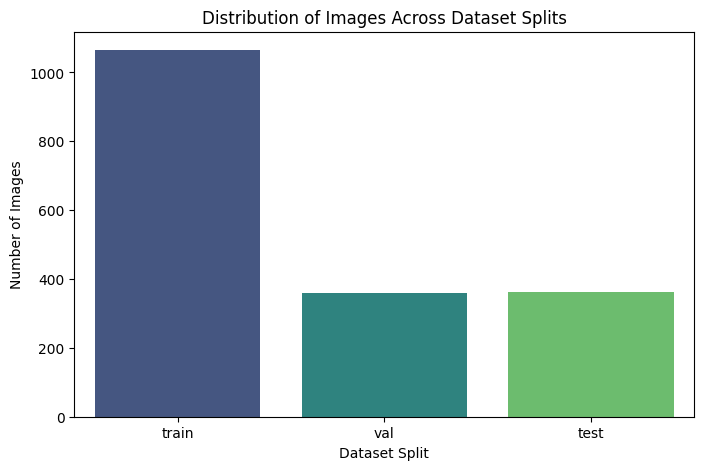

Bar chart for image distribution across splits generated.


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title('Distribution of Images Across Dataset Splits')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.show()

print("Bar chart for image distribution across splits generated.")

**###**:
Now that the image distribution has been visualized, the next step is to create a grouped bar chart to visualize the annotation counts for each class ('Fall', 'Not_Fall') across the 'train', 'val', and 'test' splits. This requires transforming the `annotation_counts` dictionary into a DataFrame suitable for Seaborn's grouped bar chart.



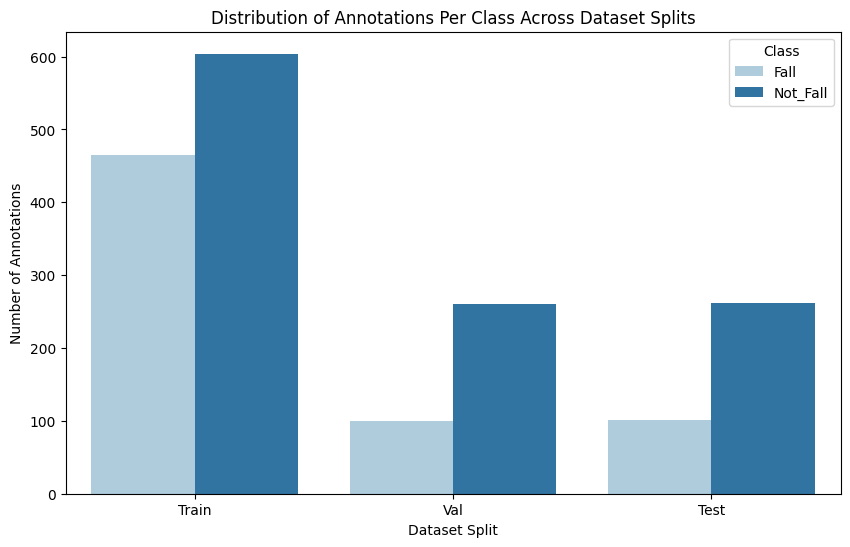

Grouped bar chart for annotation distribution across splits and classes generated.


In [ ]:
import pandas as pd

# Prepare data for grouped bar chart
data_for_plot = []
for split, classes in annotation_counts.items():
    for class_name, count in classes.items():
        data_for_plot.append({'Split': split.capitalize(), 'Class': class_name, 'Count': count})

df_annotations = pd.DataFrame(data_for_plot)

plt.figure(figsize=(10, 6))
sns.barplot(x='Split', y='Count', hue='Class', data=df_annotations, palette='Paired')
plt.title('Distribution of Annotations Per Class Across Dataset Splits')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Annotations')
plt.legend(title='Class')
plt.show()

print("Grouped bar chart for annotation distribution across splits and classes generated.")

## Display Sample Images with Annotations

### Subtask:
Select and display a few example images from the dataset, including both 'fall' and 'not fall' instances, with their corresponding bounding box annotations overlaid to visually inspect the data quality and annotation accuracy.


**###**:
The next step is to import the `PIL` (Pillow) library for image processing and `matplotlib.pyplot` for plotting to prepare for displaying images with annotations.



In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np # Often useful for image manipulation or calculations

print("Libraries imported: PIL (Image, ImageDraw), matplotlib.pyplot, numpy.")

Libraries imported: PIL (Image, ImageDraw), matplotlib.pyplot, numpy.


**###**:
Define a function, which will load an image, read its YOLO-format annotations, convert bounding box coordinates, draw the boxes and labels, and then display the image with these overlays.



In [ ]:
def plot_image_with_annotations(image_path, label_path, class_names):
    """
    Loads an image, reads its YOLO-format annotations, draws bounding boxes and labels,
    and displays the image.
    """
    try:
        image = Image.open(image_path).convert("RGB")
        img_width, img_height = image.size
        draw = ImageDraw.Draw(image)

        # Define colors for classes
        colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split(' ')
                    if len(parts) == 5:
                        class_id = int(parts[0])
                        # YOLO format: class_id center_x center_y width height (normalized)
                        center_x, center_y, bbox_width, bbox_height = map(float, parts[1:])

                        # Convert normalized coordinates to absolute pixel coordinates
                        # x_min, y_min, x_max, y_max
                        x_center_abs = center_x * img_width
                        y_center_abs = center_y * img_height
                        width_abs = bbox_width * img_width
                        height_abs = bbox_height * img_height

                        x_min = int(x_center_abs - width_abs / 2)
                        y_min = int(y_center_abs - height_abs / 2)
                        x_max = int(x_center_abs + width_abs / 2)
                        y_max = int(y_center_abs + height_abs / 2)

                        # Draw bounding box
                        current_color = colors[class_id % len(colors)]
                        draw.rectangle([x_min, y_min, x_max, y_max], outline=current_color, width=3)

                        # Draw label
                        label_text = class_names[class_id]
                        # Simple text drawing
                        draw.text((x_min + 5, y_min + 5), label_text, fill=current_color)
        else:
            print(f"No label file found for {os.path.basename(image_path)} at {label_path}")

        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.title(os.path.basename(image_path))
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

print("Function 'plot_image_with_annotations' defined.")

Function 'plot_image_with_annotations' defined.


**###**:
Select a few sample images from the 'train' and 'test' splits and visualize them with their annotations by calling the function. This will involve retrieving file paths from the previously constructed `split_paths` and using `os.path.join`.



Displaying sample images with annotations...

--- Sample Images from Training Split ---


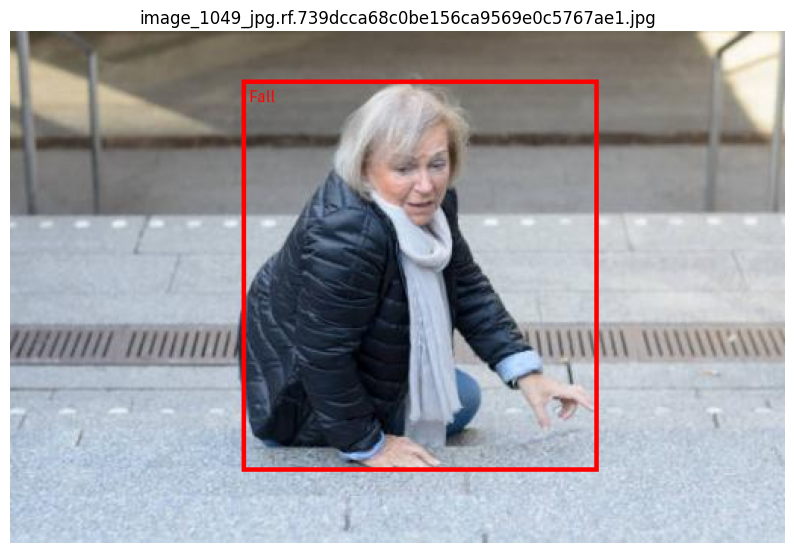

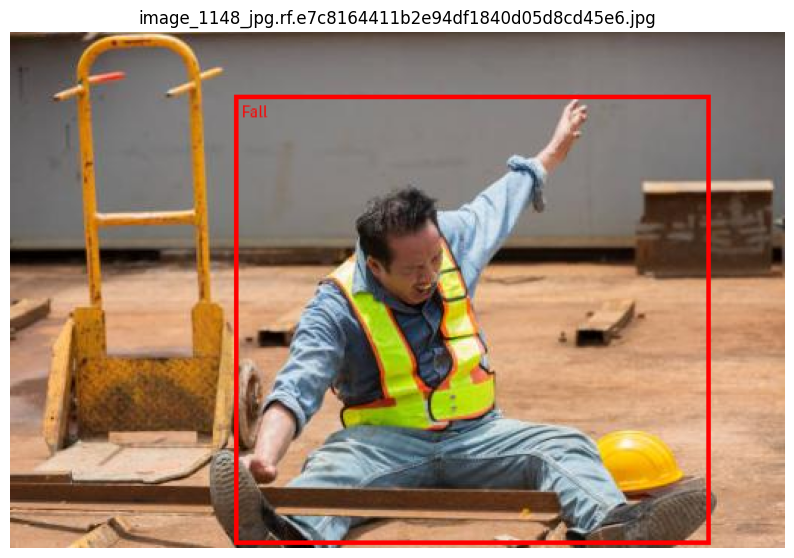


--- Sample Images from Test Split ---


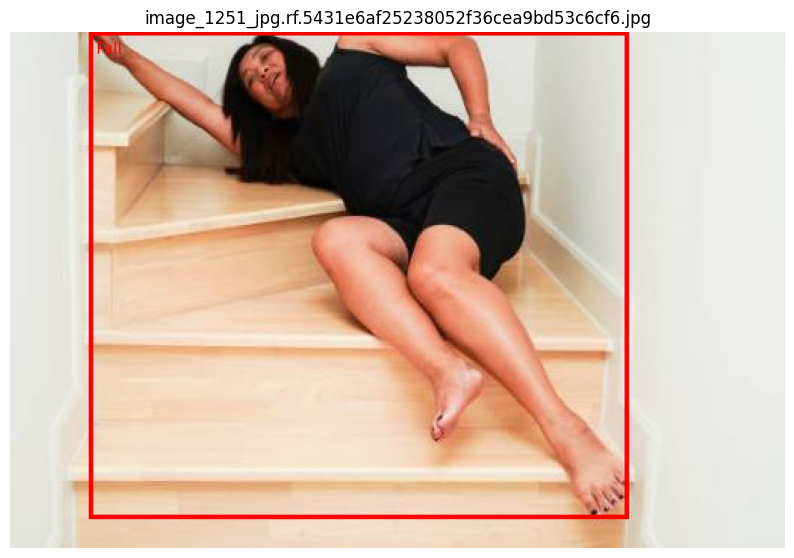

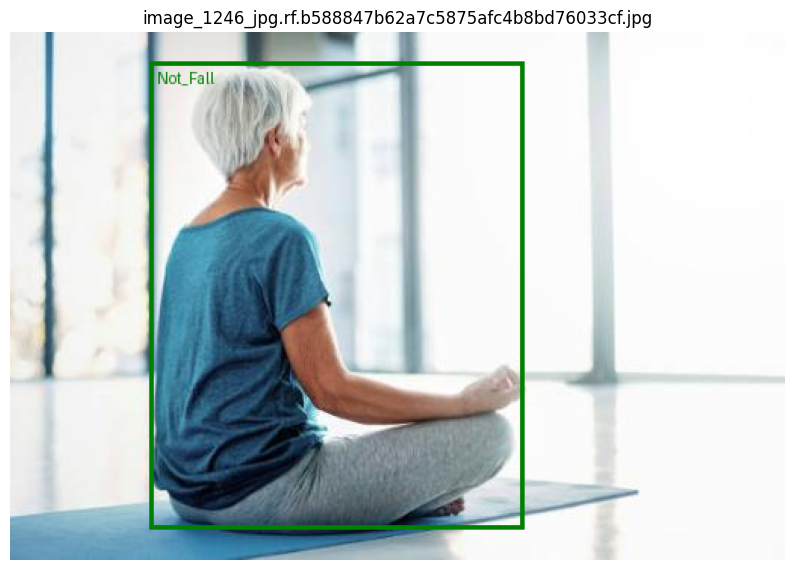

Sample image visualization complete.


In [ ]:
print("Displaying sample images with annotations...")

# Helper function to get some image/label pairs from a directory
def get_sample_files(images_dir, labels_dir, num_samples=3):
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    sample_image_paths = []
    sample_label_paths = []

    # Try to get at least num_samples images
    for i in range(min(num_samples, len(image_files))):
        img_filename = image_files[i]
        label_filename = os.path.splitext(img_filename)[0] + '.txt'
        image_path = os.path.join(images_dir, img_filename)
        label_path = os.path.join(labels_dir, label_filename)

        if os.path.exists(image_path) and os.path.exists(label_path):
            sample_image_paths.append(image_path)
            sample_label_paths.append(label_path)
        else:
            print(f"Warning: Skipping {img_filename} due to missing image or label file.")

    return list(zip(sample_image_paths, sample_label_paths))

# Get sample files from 'train' split
train_images_dir = split_paths['train']['images']
train_labels_dir = split_paths['train']['labels']
train_samples = get_sample_files(train_images_dir, train_labels_dir, num_samples=2)

# Get sample files from 'test' split
test_images_dir = split_paths['test']['images']
test_labels_dir = split_paths['test']['labels']
test_samples = get_sample_files(test_images_dir, test_labels_dir, num_samples=2)


# Visualize selected samples from train split
print("\n--- Sample Images from Training Split ---")
for image_path, label_path in train_samples:
    plot_image_with_annotations(image_path, label_path, class_names)

# Visualize selected samples from test split
print("\n--- Sample Images from Test Split ---")
for image_path, label_path in test_samples:
    plot_image_with_annotations(image_path, label_path, class_names)

print("Sample image visualization complete.")

## Prepare Data for YOLOv8 Training

### Subtask:
Set up the environment for YOLOv8 by installing the `ultralytics` library. Prepare the `data.yaml` configuration for training, ensuring paths to image and label directories and class names are correctly defined for YOLOv8.


**###**
Install the `ultralytics` library, which is necessary for YOLOv8 training. This will be done using `pip` in a code block

In [ ]:
get_ipython().system('pip install ultralytics')

print("ultralytics library installed.")

ultralytics library installed.


**###**:
Update the `data` dictionary with the absolute paths for the 'train', 'val', and 'test' image directories. This involves iterating through the `split_paths` dictionary and assigning the absolute image path for each split to the corresponding key in the `data` dictionary.



In [ ]:
for split_name in ['train', 'val', 'test']:
    data[split_name] = split_paths[split_name]['images']

print("Updated data dictionary with absolute paths for 'train', 'val', and 'test' splits.")
print(f"Updated data['train']: {data['train']}")
print(f"Updated data['val']: {data['val']}")
print(f"Updated data['test']: {data['test']}")

Updated data dictionary with absolute paths for 'train', 'val', and 'test' splits.
Updated data['train']: /content/drive/My Drive/FallDetection_yolo/train/images
Updated data['val']: /content/drive/My Drive/FallDetection_yolo/valid/images
Updated data['test']: /content/drive/My Drive/FallDetection_yolo/test/images


**###**:
Define a new path for saving this modified configuration, specifically a `yolov8_data.yaml` file within the `dataset_base_path`.



In [ ]:
yolov8_data_path = os.path.join(dataset_base_path, 'yolov8_data.yaml')

print(f"Defined new YOLOv8 data path: {yolov8_data_path}")

Defined new YOLOv8 data path: /content/drive/My Drive/FallDetection_yolo/yolov8_data.yaml


**###**:
Prepare the data for YOLOv8 is to save the updated `data` dictionary, which now contains absolute paths for the dataset splits, to the newly defined `yolov8_data.yaml` file using `yaml.dump()`.



In [ ]:
with open(yolov8_data_path, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

print(f"Modified data.yaml saved to: {yolov8_data_path}")

Modified data.yaml saved to: /content/drive/My Drive/FallDetection_yolo/yolov8_data.yaml


## Train YOLOv8 Model



**###**:
Import the `YOLO` class from `ultralytics` and then initialize a pre-trained YOLOv8 nano model.



In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model
model = YOLO('yolov8n.pt')

print("YOLOv8n model loaded.")

YOLOv8n model loaded.


**###**:
Initiate the training process using the `.train()` method with the specified data, epochs, and image size.



In [ ]:
print(f"Starting model training with data: {yolov8_data_path}")

# Train the model
results = model.train(data=yolov8_data_path, epochs=30, imgsz=640)

print("Model training complete. Results object stored in 'results'.")

Starting model training with data: /content/drive/My Drive/FallDetection_yolo/yolov8_data.yaml
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/FallDetection_yolo/yolov8_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nb

**###**
30 epochs completed in `7.762 hours`.


**###**:
Evaluate its performance on the `test` split using the `.val()` method. This will provide metrics to assess how well the model generalizes to unseen data.



In [ ]:
print("Starting model evaluation on the test set...")

# Evaluate the model on the test set
metrics = model.val(data=yolov8_data_path, split='test', imgsz=640)

print("Model evaluation complete. Metrics object stored in 'metrics'.")


Starting model evaluation on the test set...
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.9±0.5 ms, read: 0.1±0.0 MB/s, size: 22.2 KB)
val: Scanning /content/drive/My Drive/FallDetection_yolo/test/labels... 361 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 361/361 47.9it/s 7.5s
val: New cache created: /content/drive/My Drive/FallDetection_yolo/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 2.8s/it 1:04
                   all        361        363       0.94      0.922      0.975      0.831
                  Fall        101        101      0.926      0.881       0.96      0.795
              Not_Fall        262        262      0.955      0.962       0.99      0.867
Speed: 1.3ms preprocess, 161.9ms inference, 0.0ms loss, 0.4ms postprocess per ima

In [ ]:
print("Evaluation Metrics (metrics.results_dict):")
for metric_name, metric_value in metrics.results_dict.items():
    print(f"  {metric_name}: {metric_value}")

# metrics.box.map50 and metrics.box.map are scalar overall metrics, not per-class arrays.
# The IndexError occurred because we tried to index a scalar. We will print them directly.

print("\nOverall mAP50 (Bounding Box):")
print(f"  {metrics.box.map50:.3f}")

print("\nOverall mAP50-95 (Bounding Box):")
print(f"  {metrics.box.map:.3f}")

Evaluation Metrics (metrics.results_dict):
  metrics/precision(B): 0.9402398758128052
  metrics/recall(B): 0.9215329202280524
  metrics/mAP50(B): 0.9747675277908046
  metrics/mAP50-95(B): 0.830772548408287
  fitness: 0.830772548408287

Overall mAP50 (Bounding Box):
  0.975

Overall mAP50-95 (Bounding Box):
  0.831


# Task
Define the paths to the YOLOv8 training results directory (e.g., `/content/runs/detect/train3`) and the validation results directory (`/content/runs/detect/val`).

## Define Result Paths

### Subtask:
Define the paths to the directories where the YOLOv8 training and validation results are stored. These are typically in `/content/runs/detect/trainX` and `/content/runs/detect/val`.


**Reasoning**:
The subtask requires defining specific paths for training and validation results. I will use a code block to declare and assign the provided directory paths to `train_results_dir` and `val_results_dir` variables, and then print their values to confirm the assignment.



In [ ]:
train_results_dir = '/content/runs/detect/train3'
val_results_dir = '/content/runs/detect/val'

print(f"Training results directory: {train_results_dir}")
print(f"Validation results directory: {val_results_dir}")

Training results directory: /content/runs/detect/train3
Validation results directory: /content/runs/detect/val


## Visualize Training Metrics

### Subtask:
Display the results.png file from the training run directory, which typically shows the loss, mAP, precision, and recall curves over epochs. This provides an overview of the model's learning progress.


**Reasoning**:
To visualize the training metrics, I need to construct the full path to the 'results.png' file within the training results directory, check its existence, and then display it using `IPython.display.Image` as per the instructions.



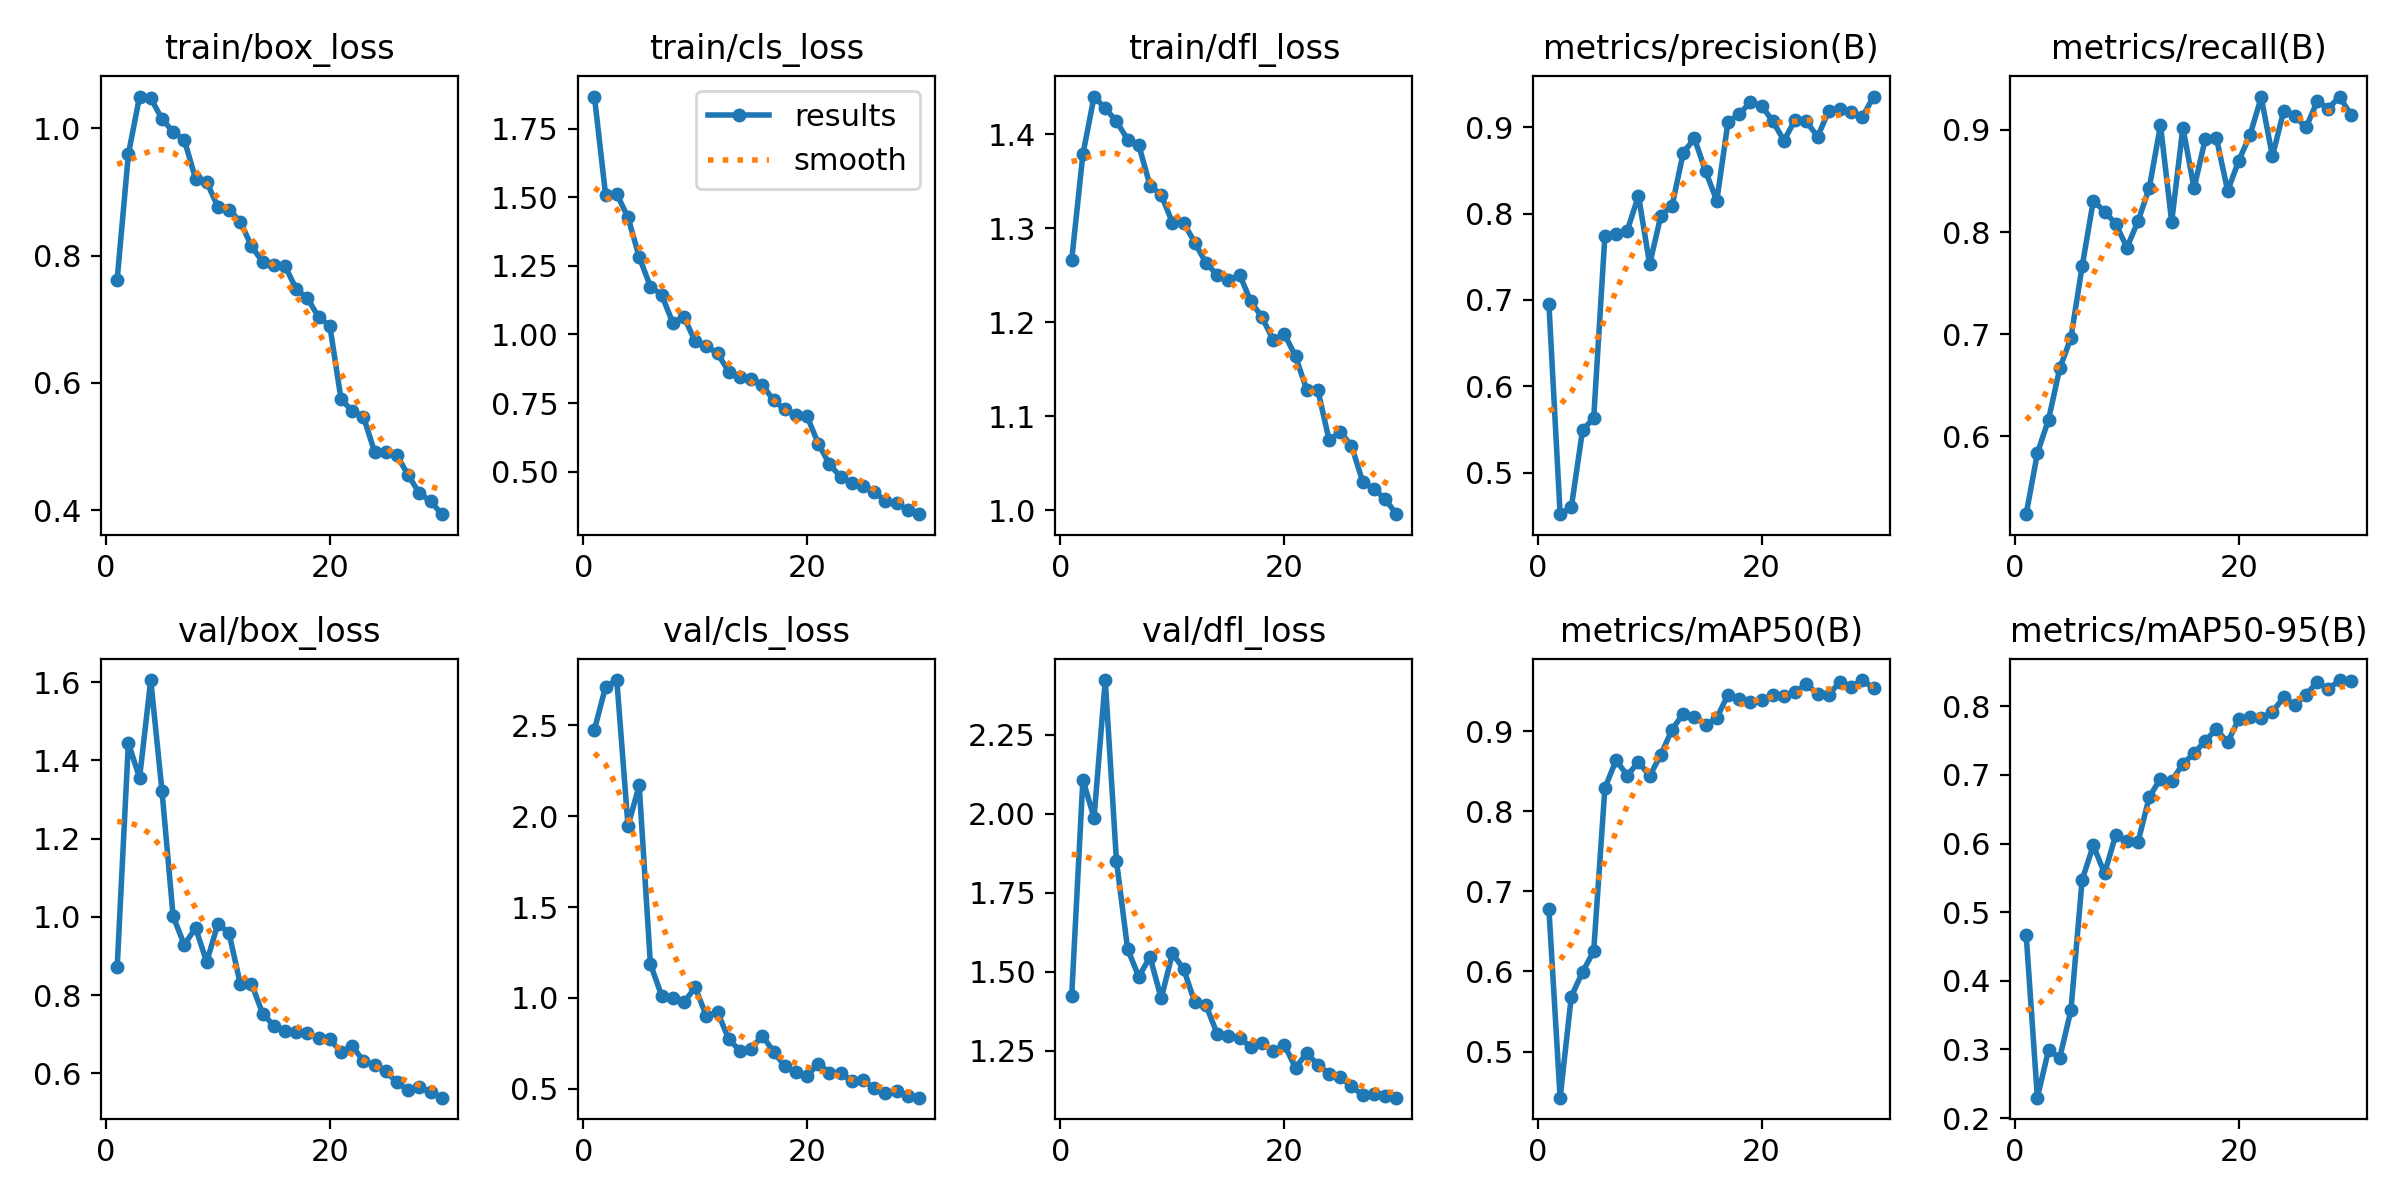

Displayed training results image from: /content/runs/detect/train3/results.png


In [ ]:
from IPython.display import Image
import os

# Construct the full path to the results.png file
results_image_path = os.path.join(train_results_dir, 'results.png')

# Check if the file exists and display it
if os.path.exists(results_image_path):
    display(Image(filename=results_image_path, width=800))
    print(f"Displayed training results image from: {results_image_path}")
else:
    print(f"Error: Training results image not found at {results_image_path}")

## Visualize Precision-Recall and F1 Curves

### Subtask:
Display the `BoxP_curve.png`, `BoxR_curve.png`, and `BoxF1_curve.png` images from the validation run directory. These plots illustrate the model's precision, recall, and F1-score at various confidence thresholds.


**Reasoning**:
To visualize the Precision-Recall and F1 curves, I need to construct the full paths to the `BoxP_curve.png`, `BoxR_curve.png`, and `BoxF1_curve.png` files within the `val_results_dir`, check for their existence, and then display them using `IPython.display.Image` as per the instructions.



Displaying Precision-Recall and F1 Curves from validation results...


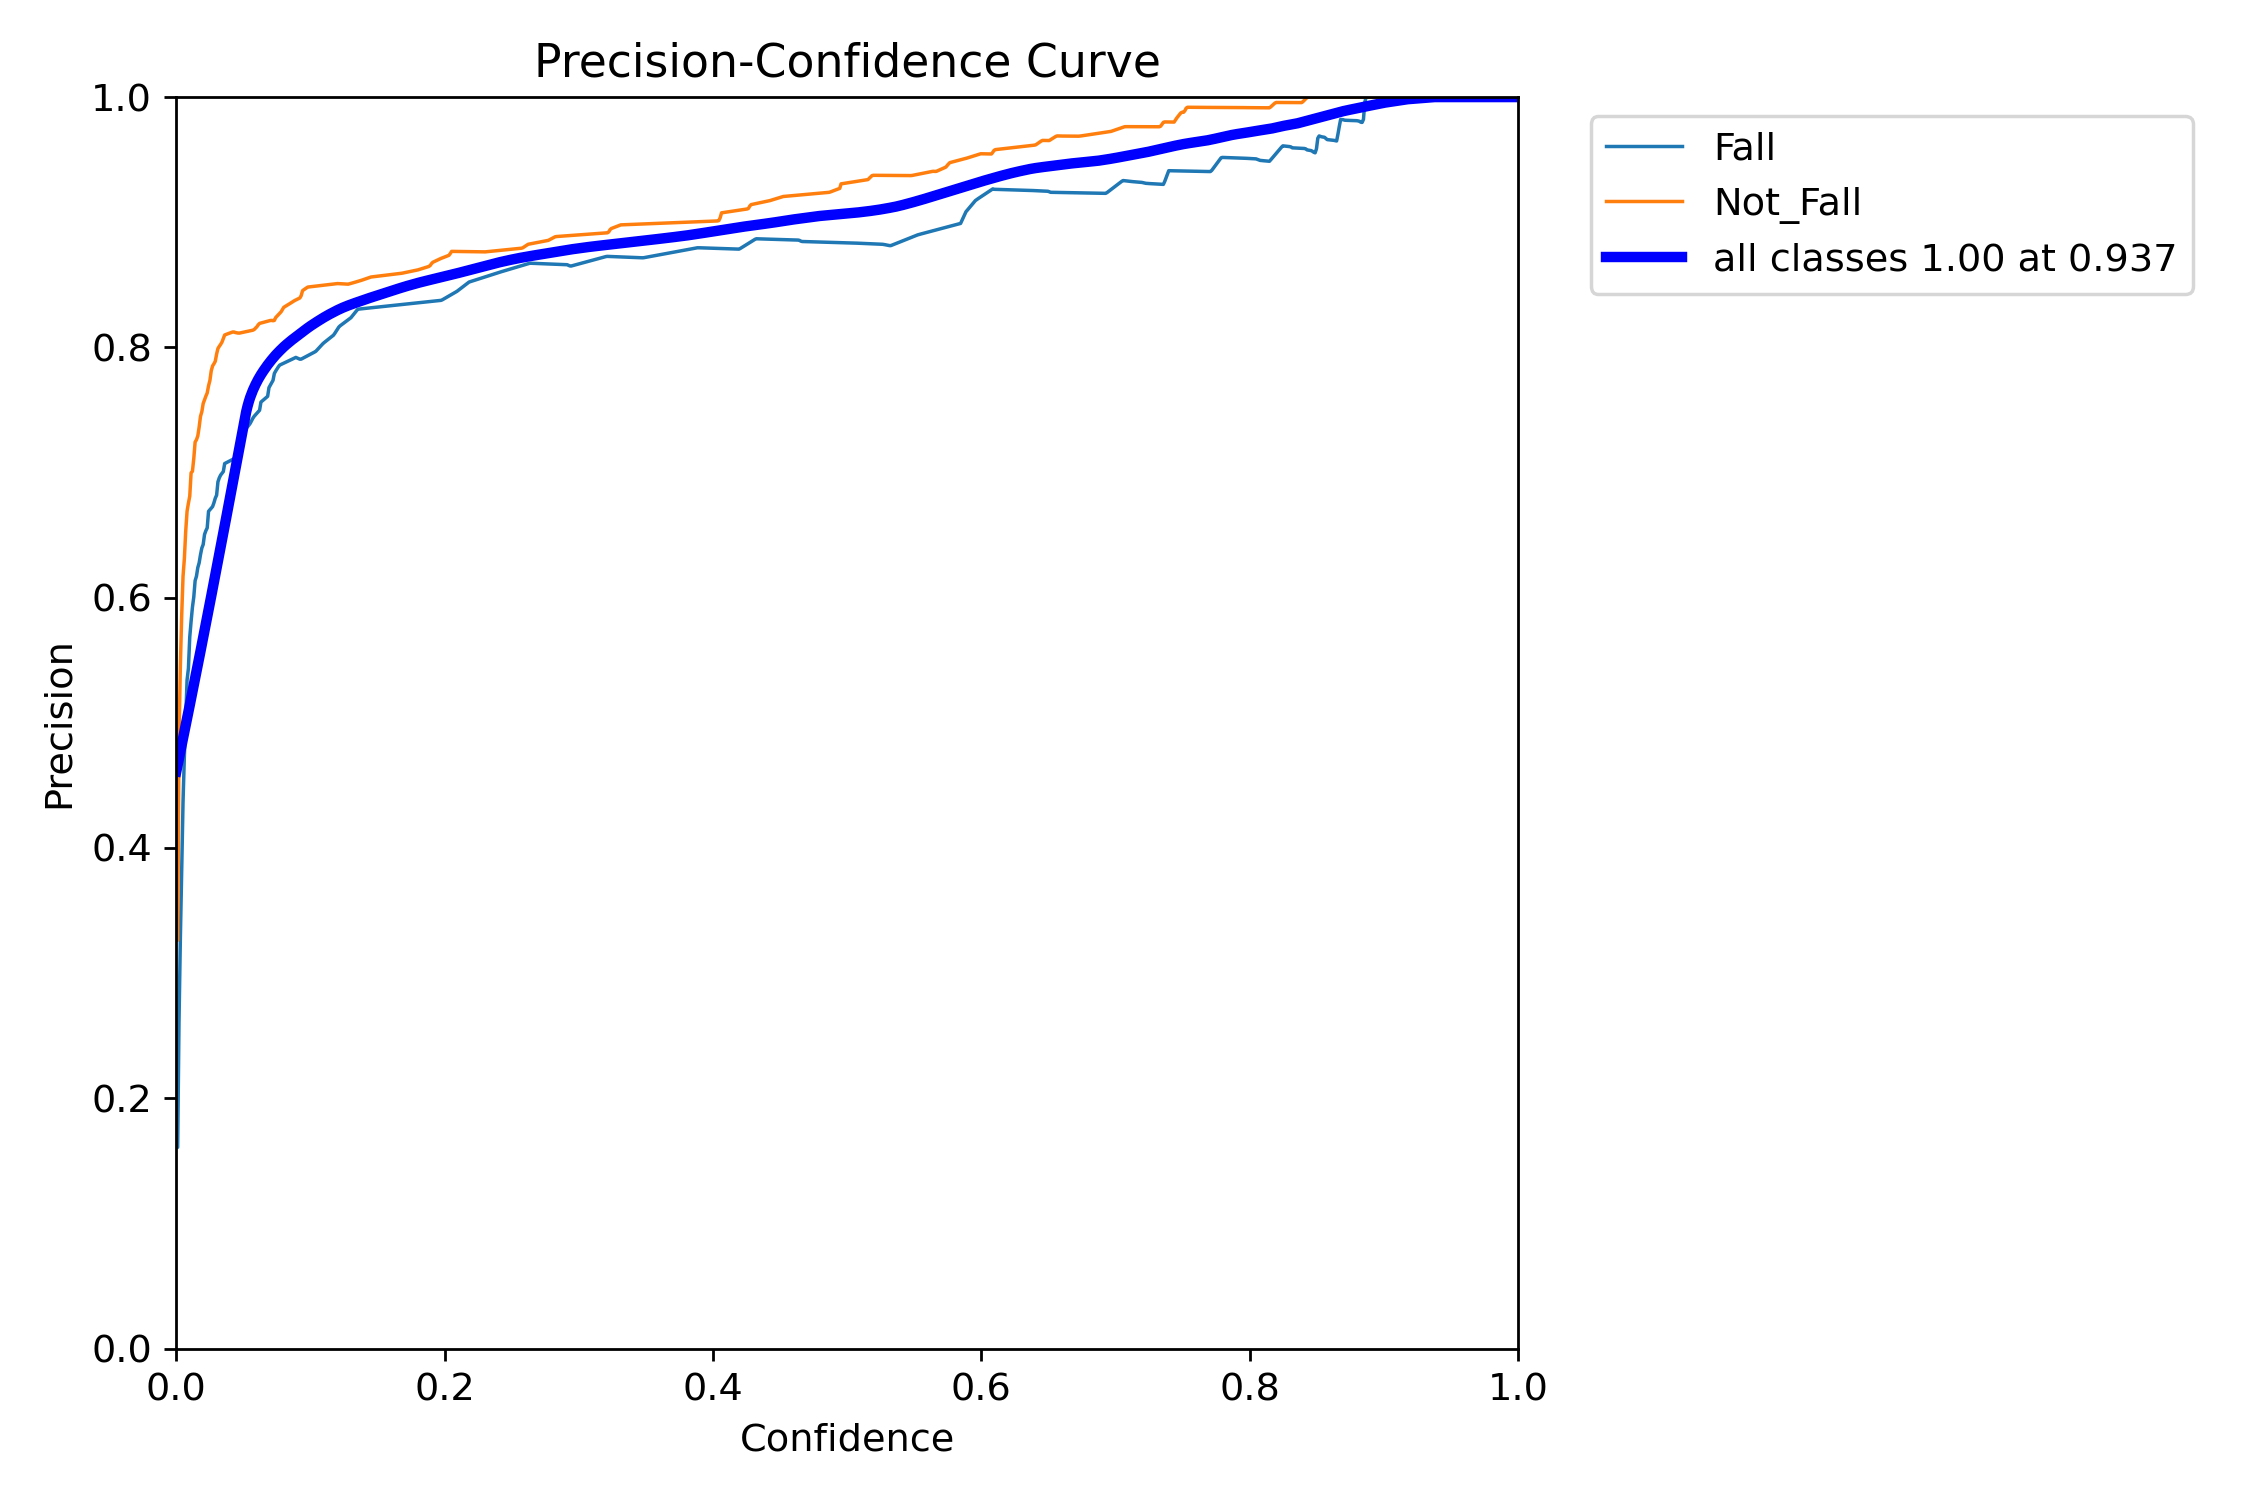

Displayed BoxP_curve.png from: /content/runs/detect/val/BoxP_curve.png


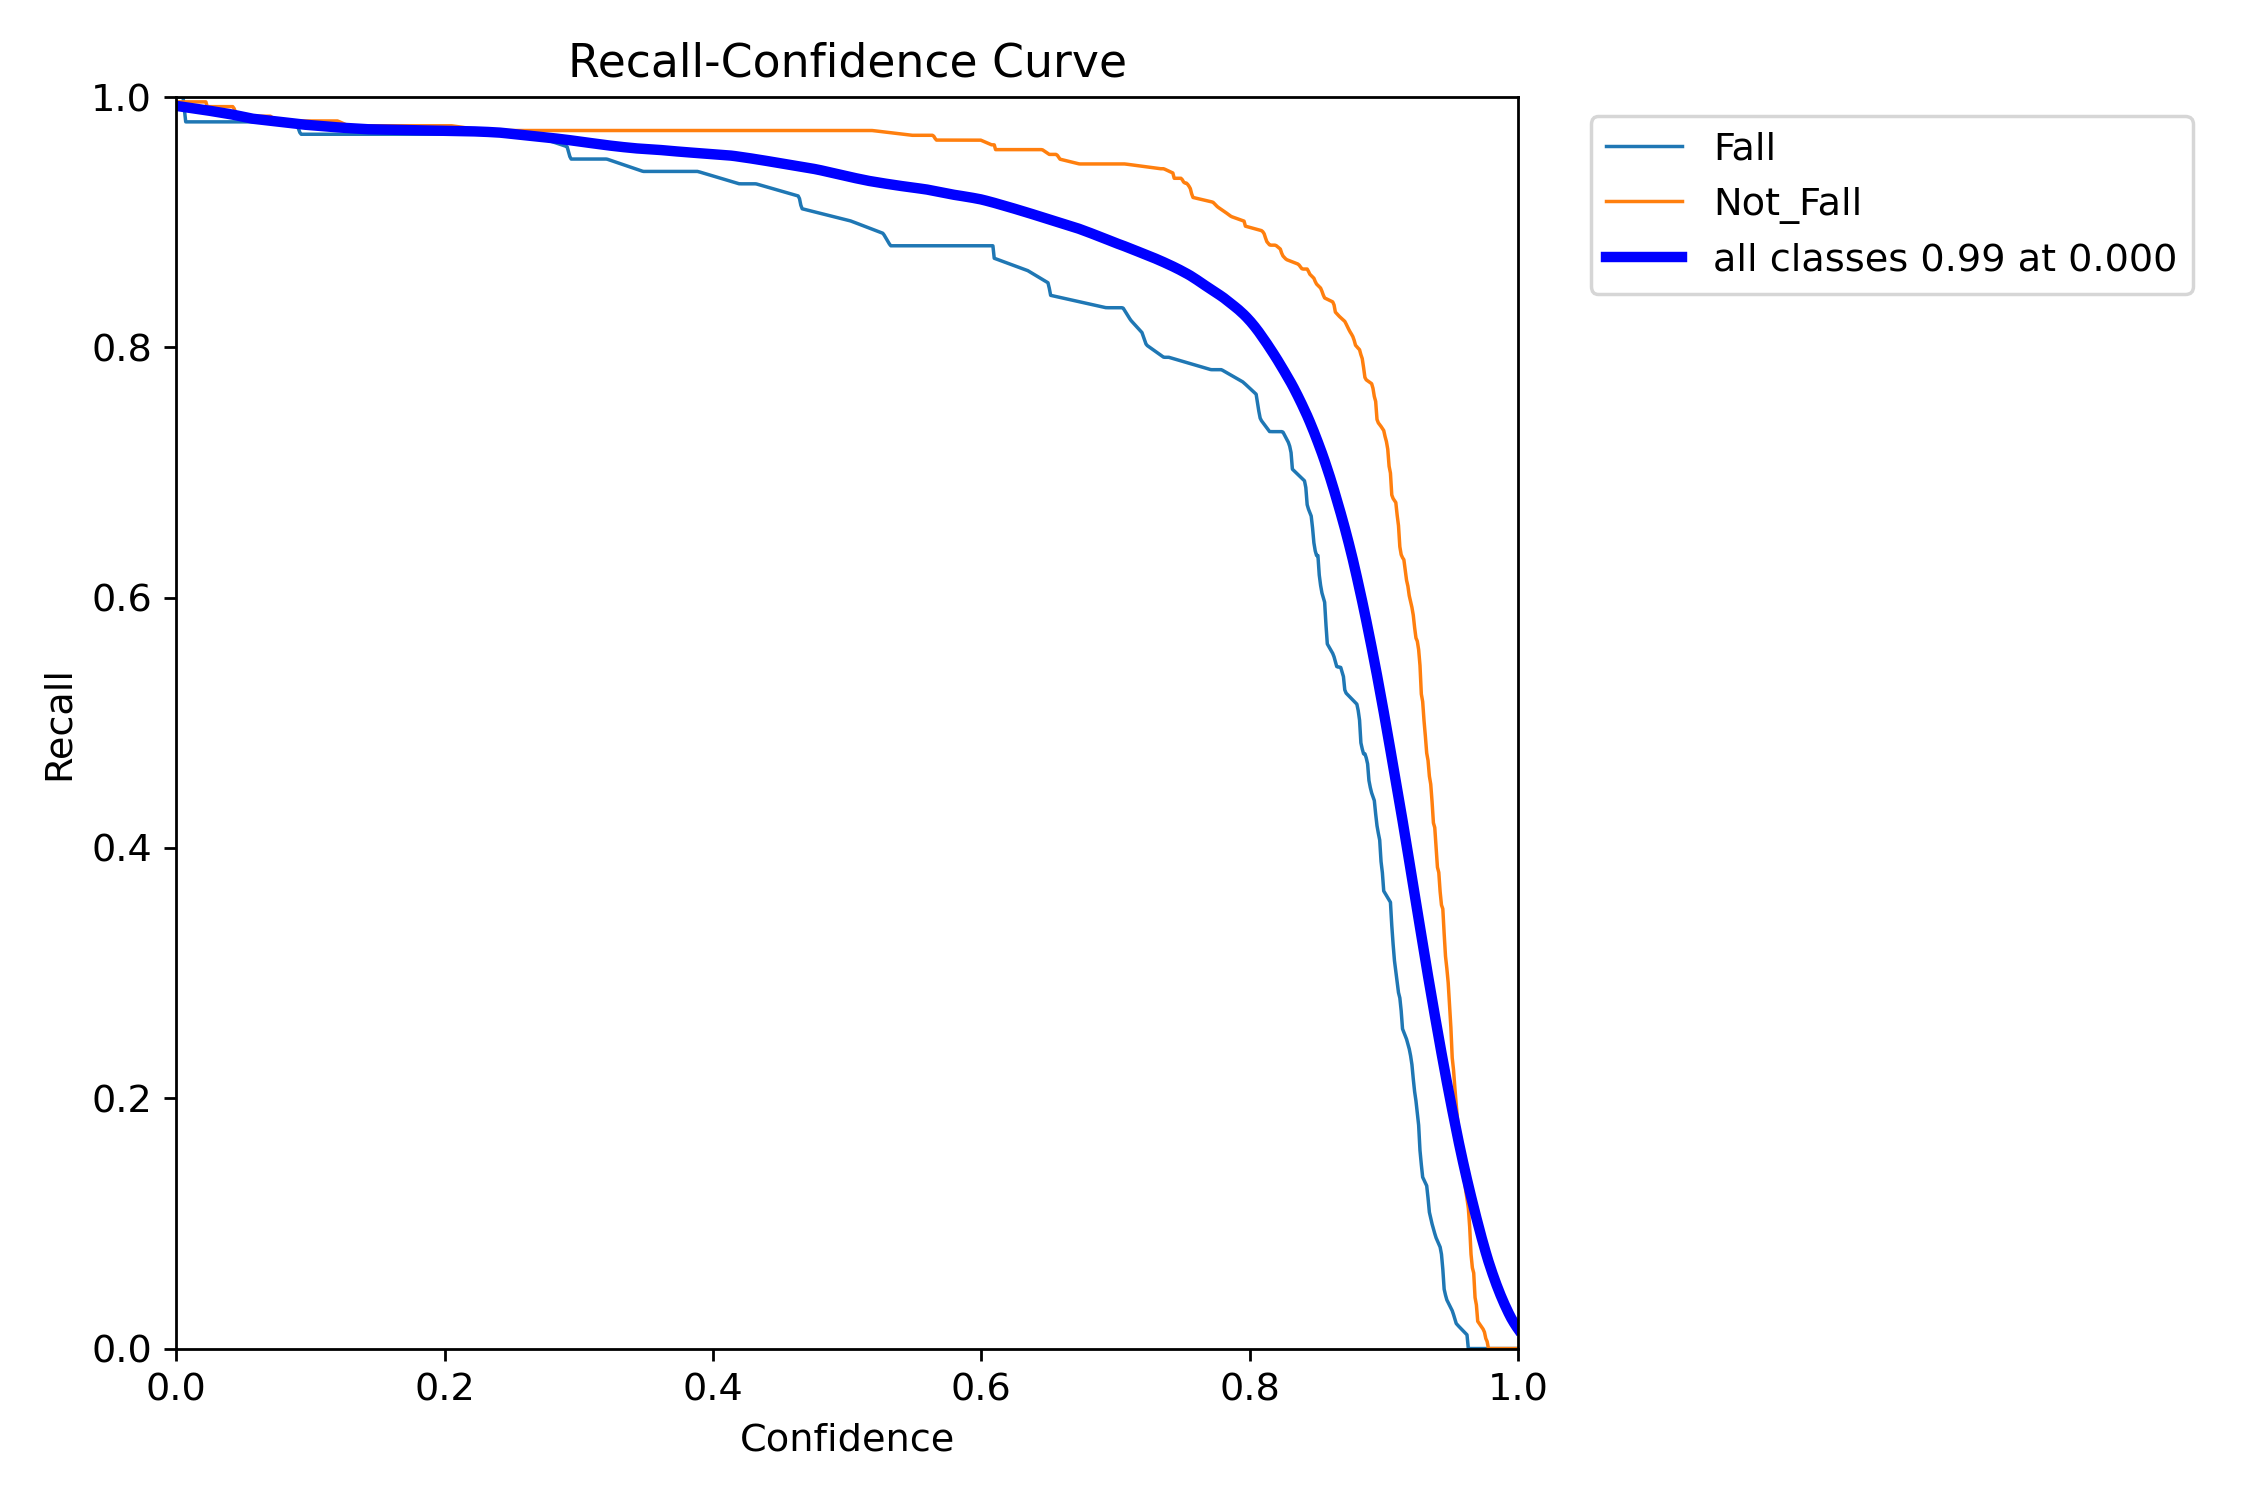

Displayed BoxR_curve.png from: /content/runs/detect/val/BoxR_curve.png


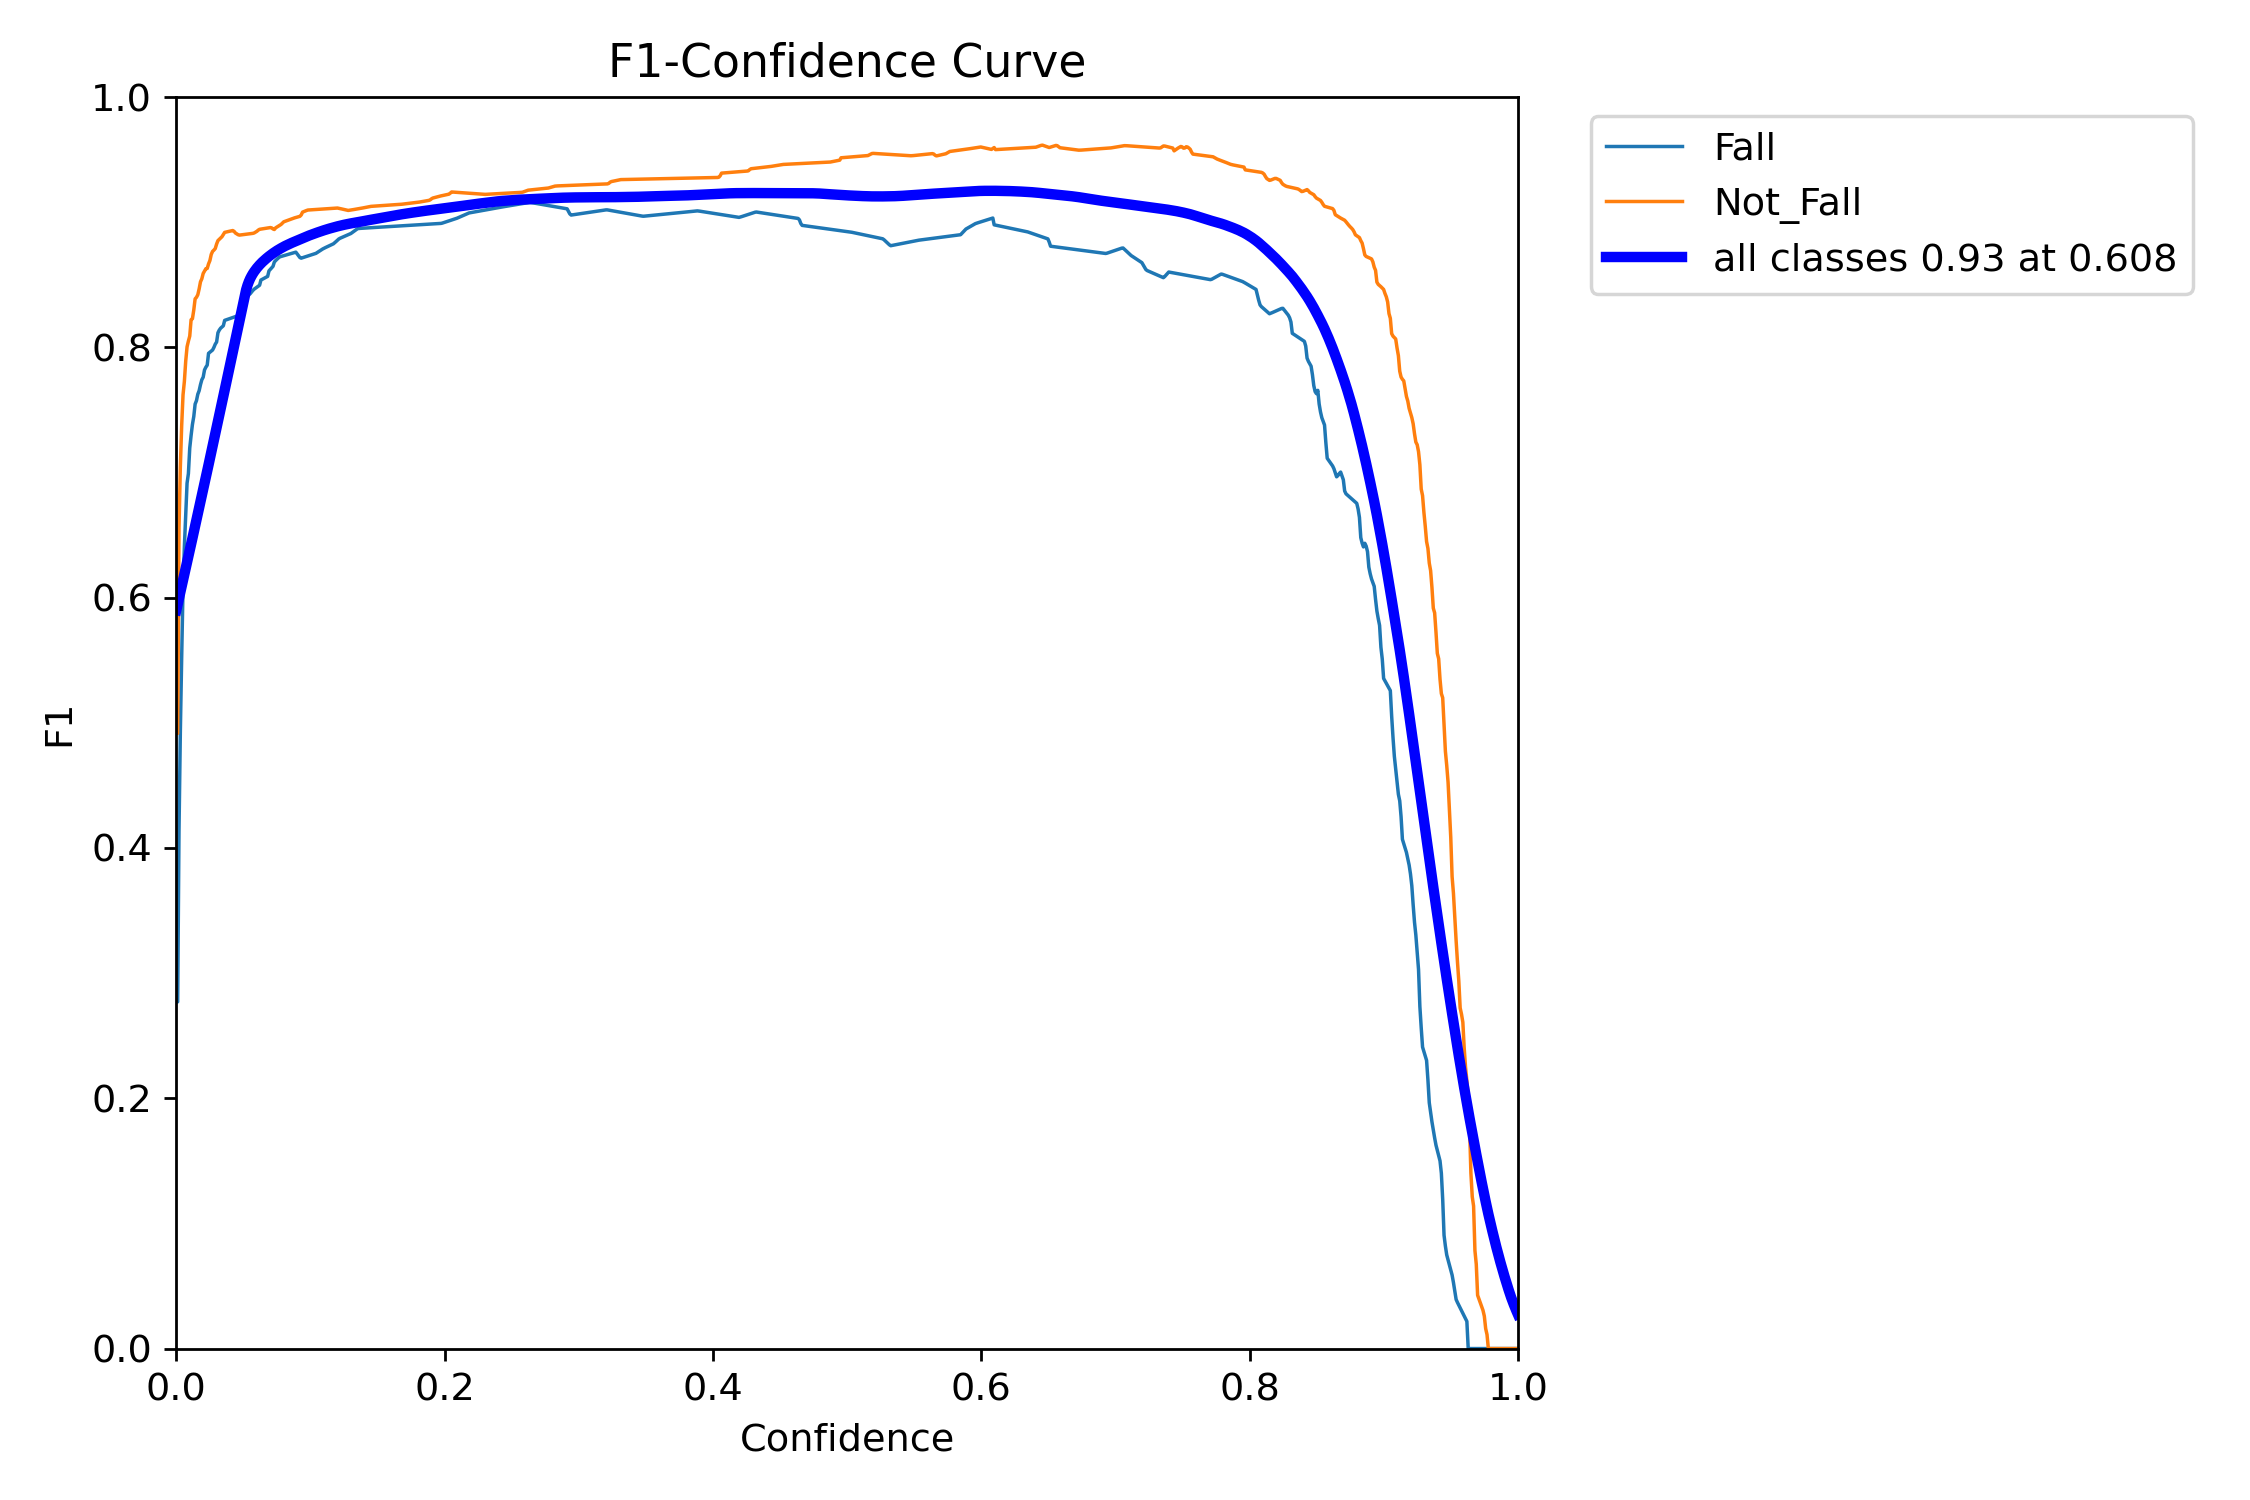

Displayed BoxF1_curve.png from: /content/runs/detect/val/BoxF1_curve.png
Curve visualization complete.


In [ ]:
from IPython.display import Image
import os

# List of curve files to display
curve_files = ['BoxP_curve.png', 'BoxR_curve.png', 'BoxF1_curve.png']

print("Displaying Precision-Recall and F1 Curves from validation results...")

for curve_file in curve_files:
    curve_image_path = os.path.join(val_results_dir, curve_file)

    if os.path.exists(curve_image_path):
        display(Image(filename=curve_image_path, width=800))
        print(f"Displayed {curve_file} from: {curve_image_path}")
    else:
        print(f"Error: {curve_file} not found at {curve_image_path}")

print("Curve visualization complete.")

## Visualize Additional Confusion Matrices

### Subtask:
Display the normalized confusion matrix (confusion_matrix_normalized.png) from the validation run directory to complement the previously shown confusion matrix and provide further insight into class-wise performance.


**Reasoning**:
To display the normalized confusion matrix, I will construct its path using the `val_results_dir`, verify its existence, and then use `IPython.display.Image` to visualize it, as specified in the instructions.



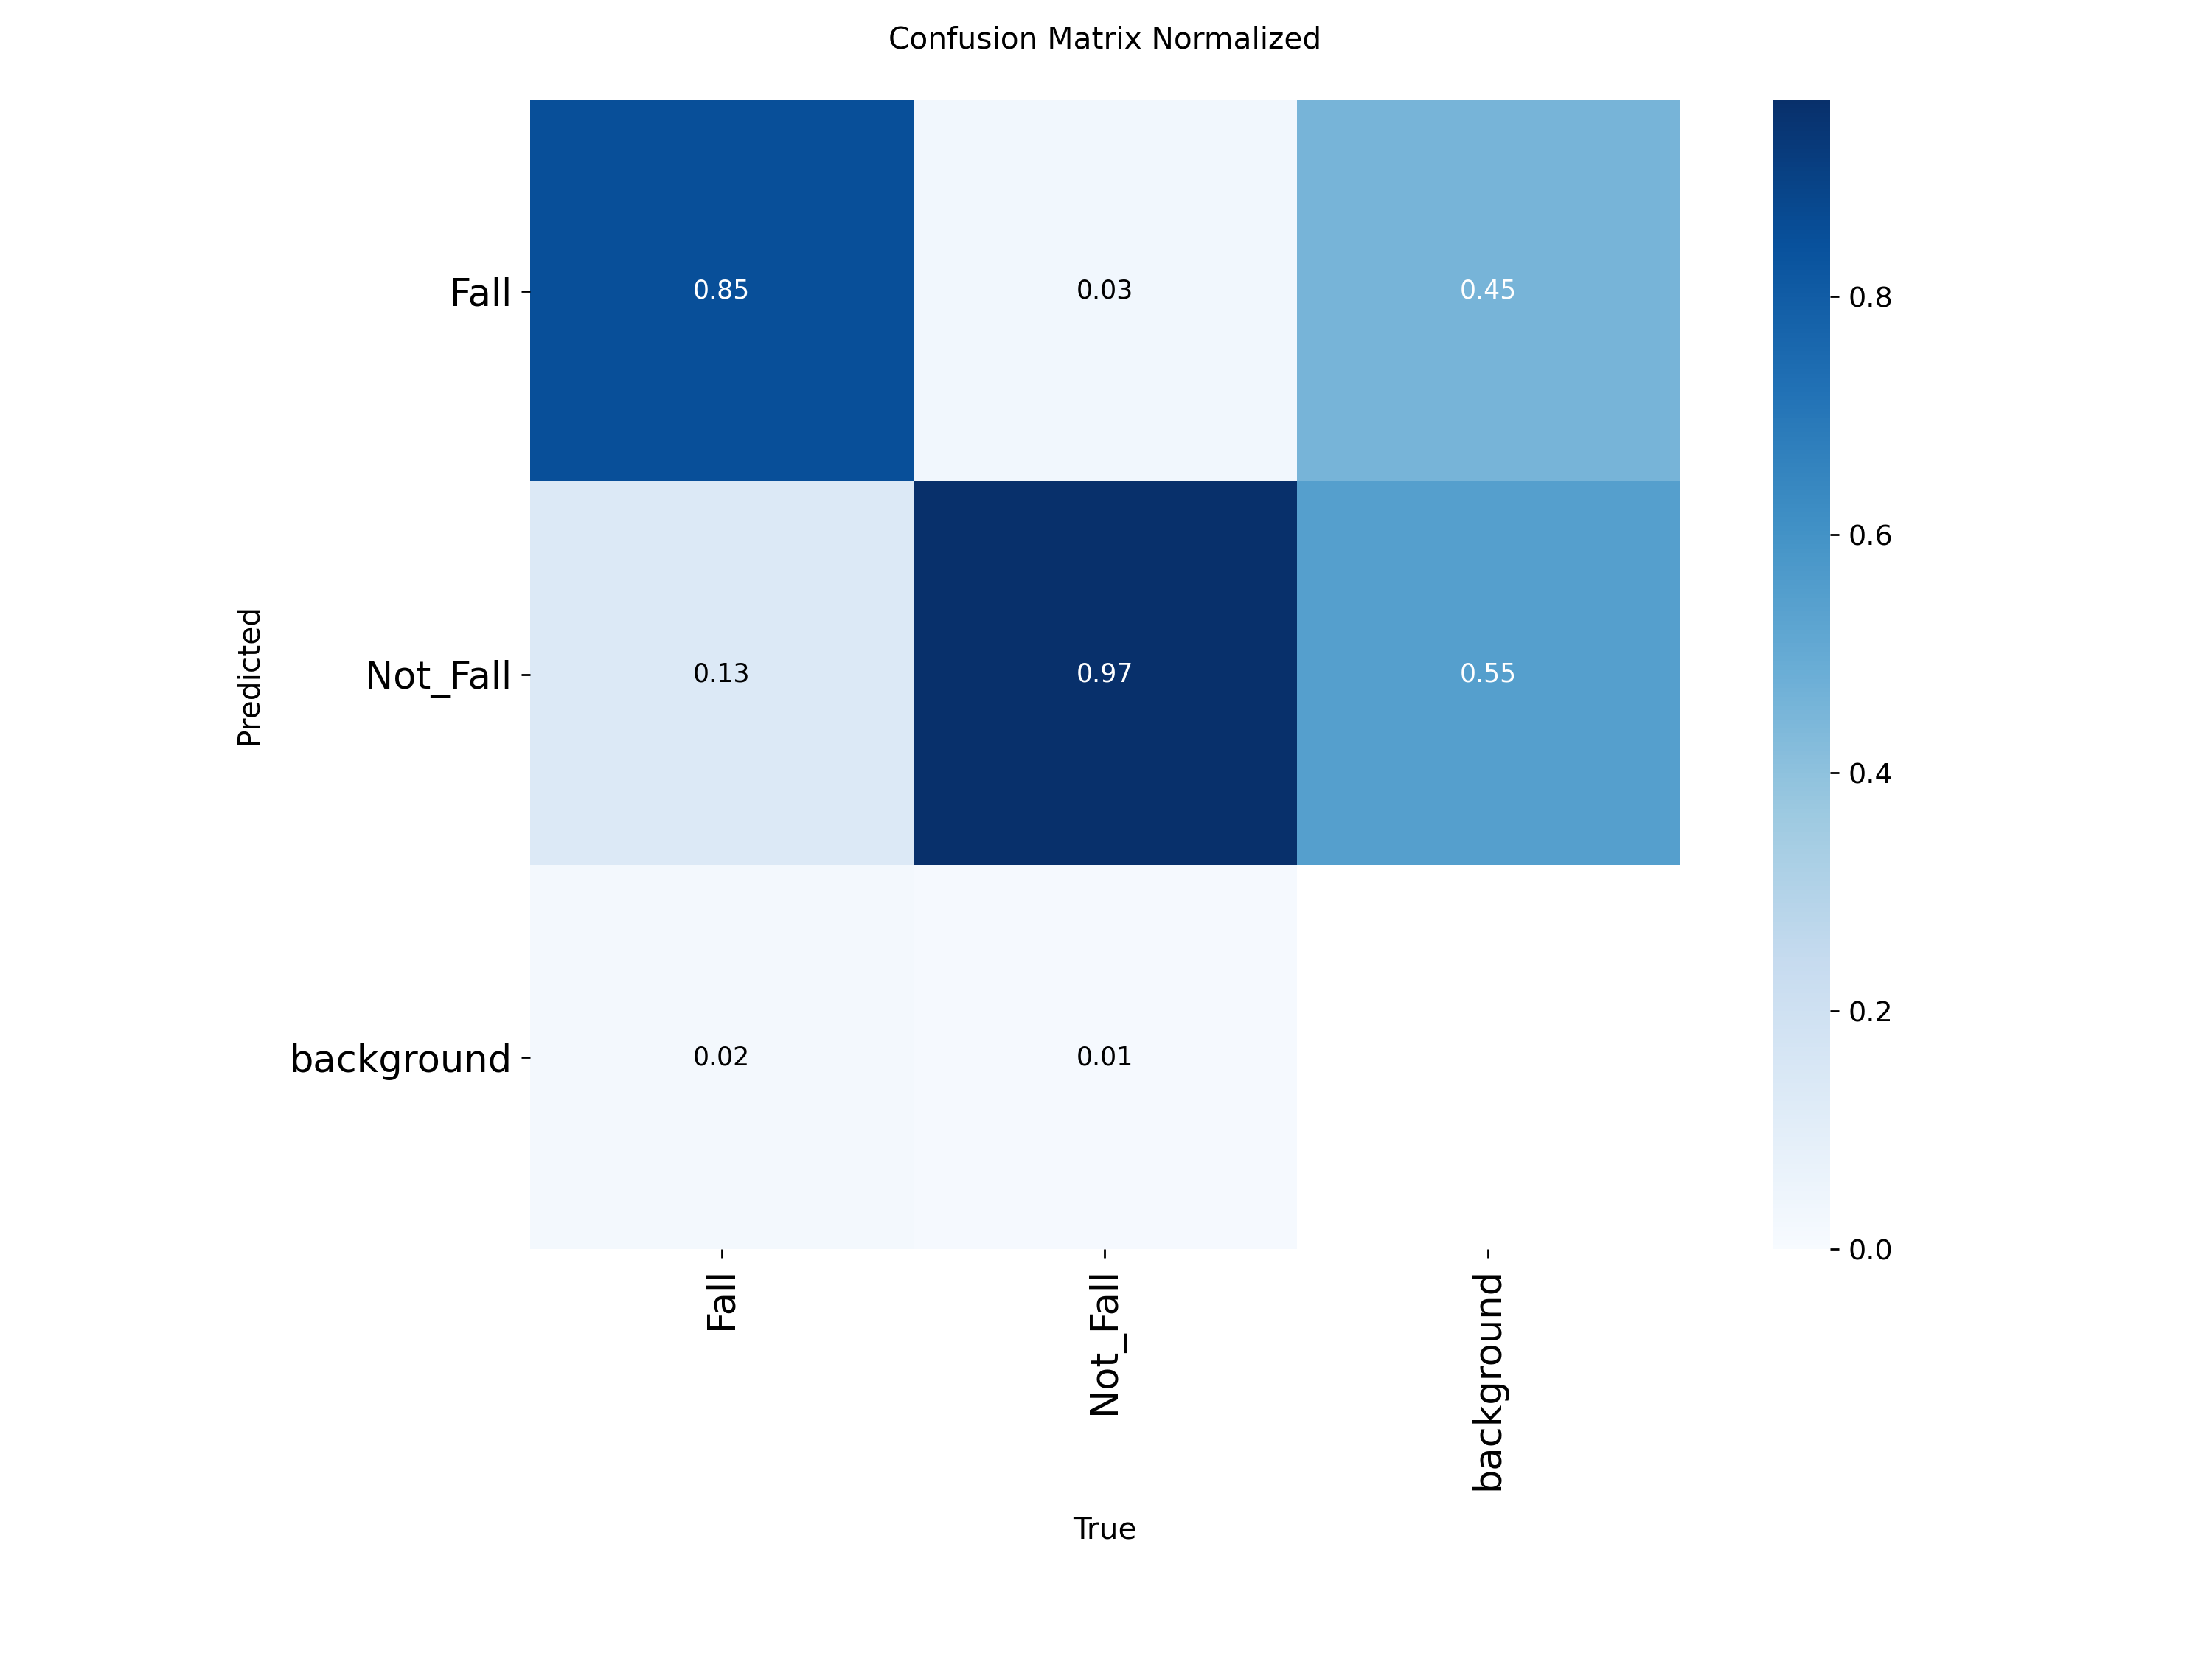

Displayed normalized confusion matrix from: /content/runs/detect/val/confusion_matrix_normalized.png


In [ ]:
from IPython.display import Image
import os

# Construct the full path to the normalized confusion matrix file
normalized_confusion_matrix_path = os.path.join(val_results_dir, 'confusion_matrix_normalized.png')

# Check if the file exists and display it
if os.path.exists(normalized_confusion_matrix_path):
    display(Image(filename=normalized_confusion_matrix_path, width=600))
    print(f"Displayed normalized confusion matrix from: {normalized_confusion_matrix_path}")
else:
    print(f"Error: Normalized confusion matrix not found at {normalized_confusion_matrix_path}")

## Visualize Sample Predictions

### Subtask:
Display sample images with predicted bounding boxes and labels from the validation run (`val_batch0_pred.jpg`, `val_batch1_pred.jpg`, `val_batch2_pred.jpg`) to visually assess the model's detection capabilities on unseen data.


**Reasoning**:
To display the sample prediction images, I will define a list of the specified filenames, iterate through them, construct their full paths using `val_results_dir`, check for existence, and then display each image with `IPython.display.Image`.



Displaying sample prediction images from validation results...


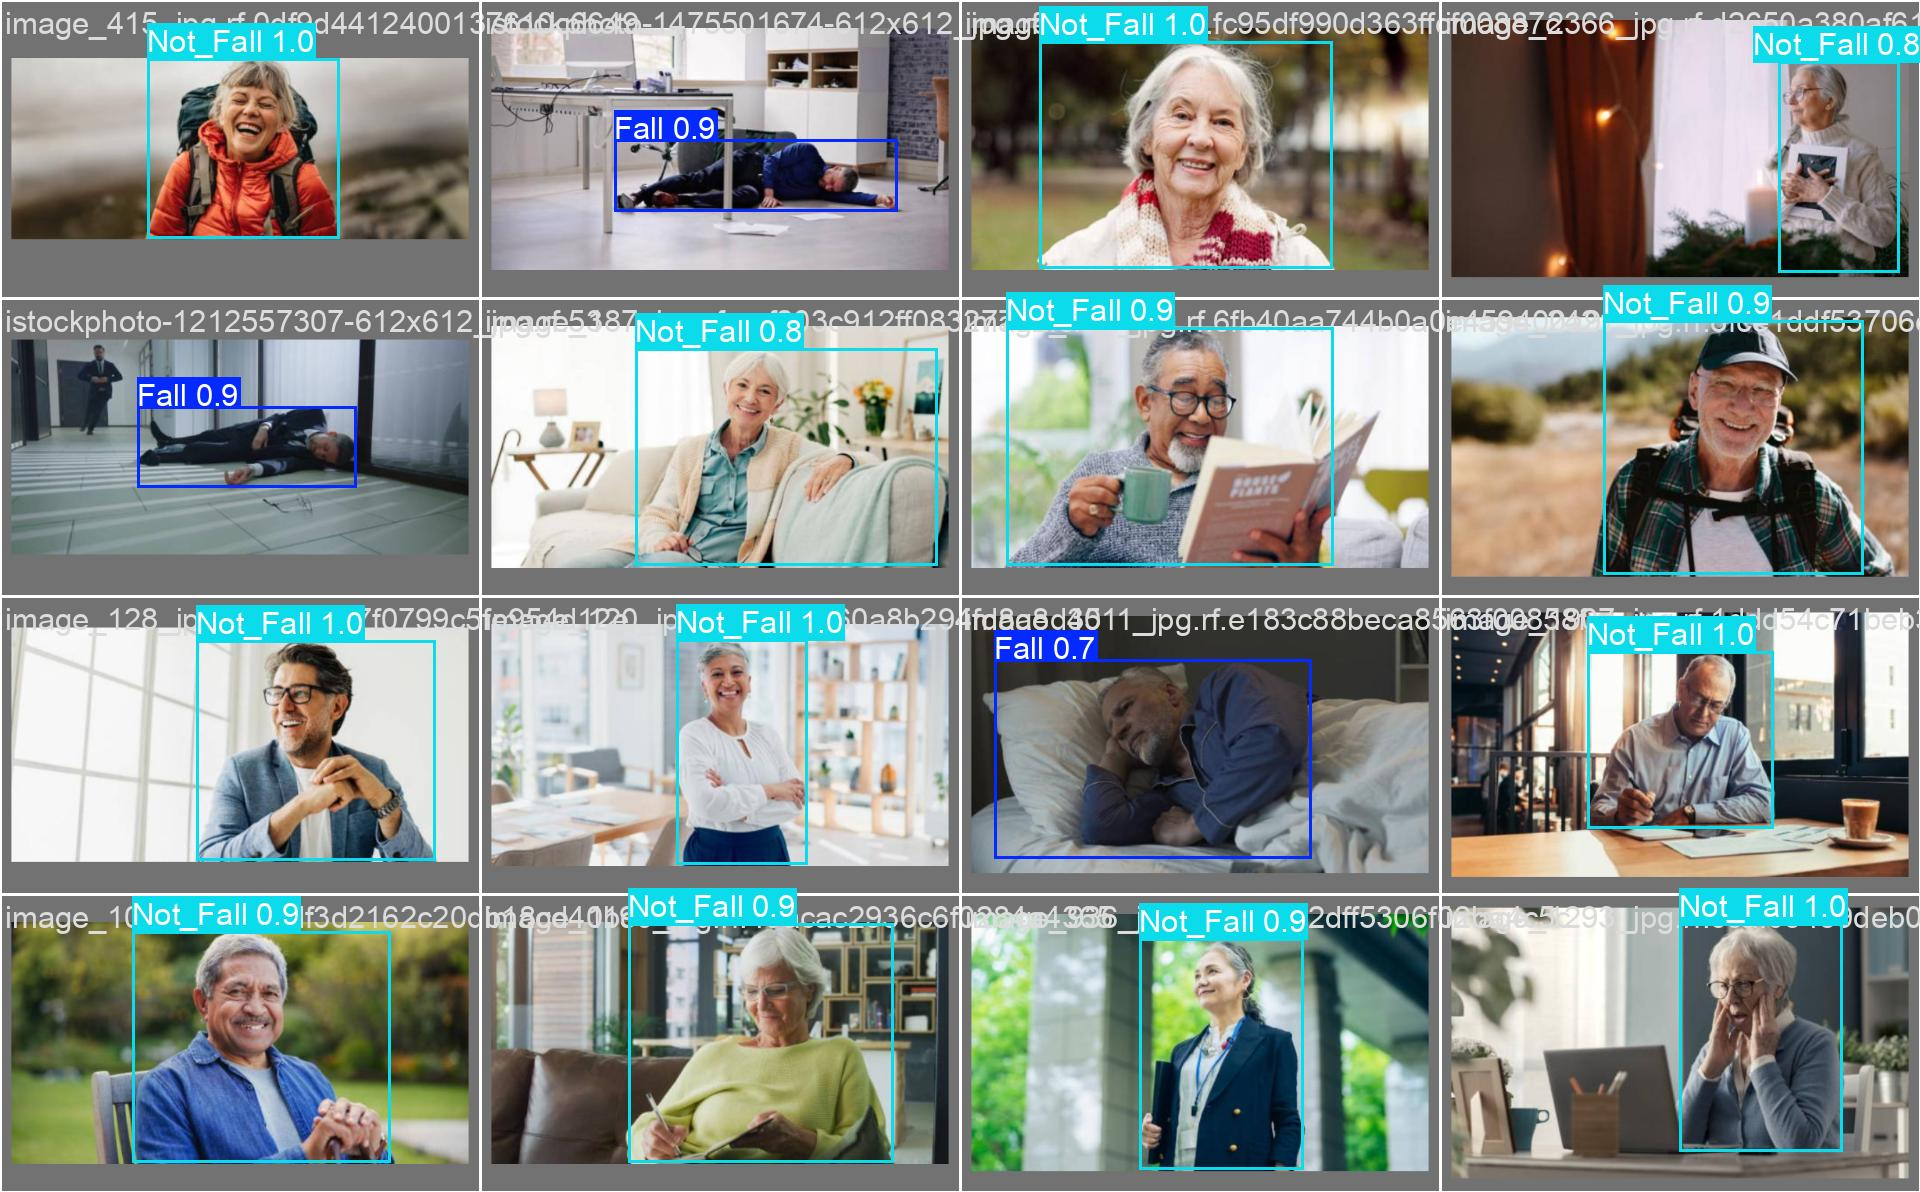

Displayed val_batch0_pred.jpg from: /content/runs/detect/val/val_batch0_pred.jpg


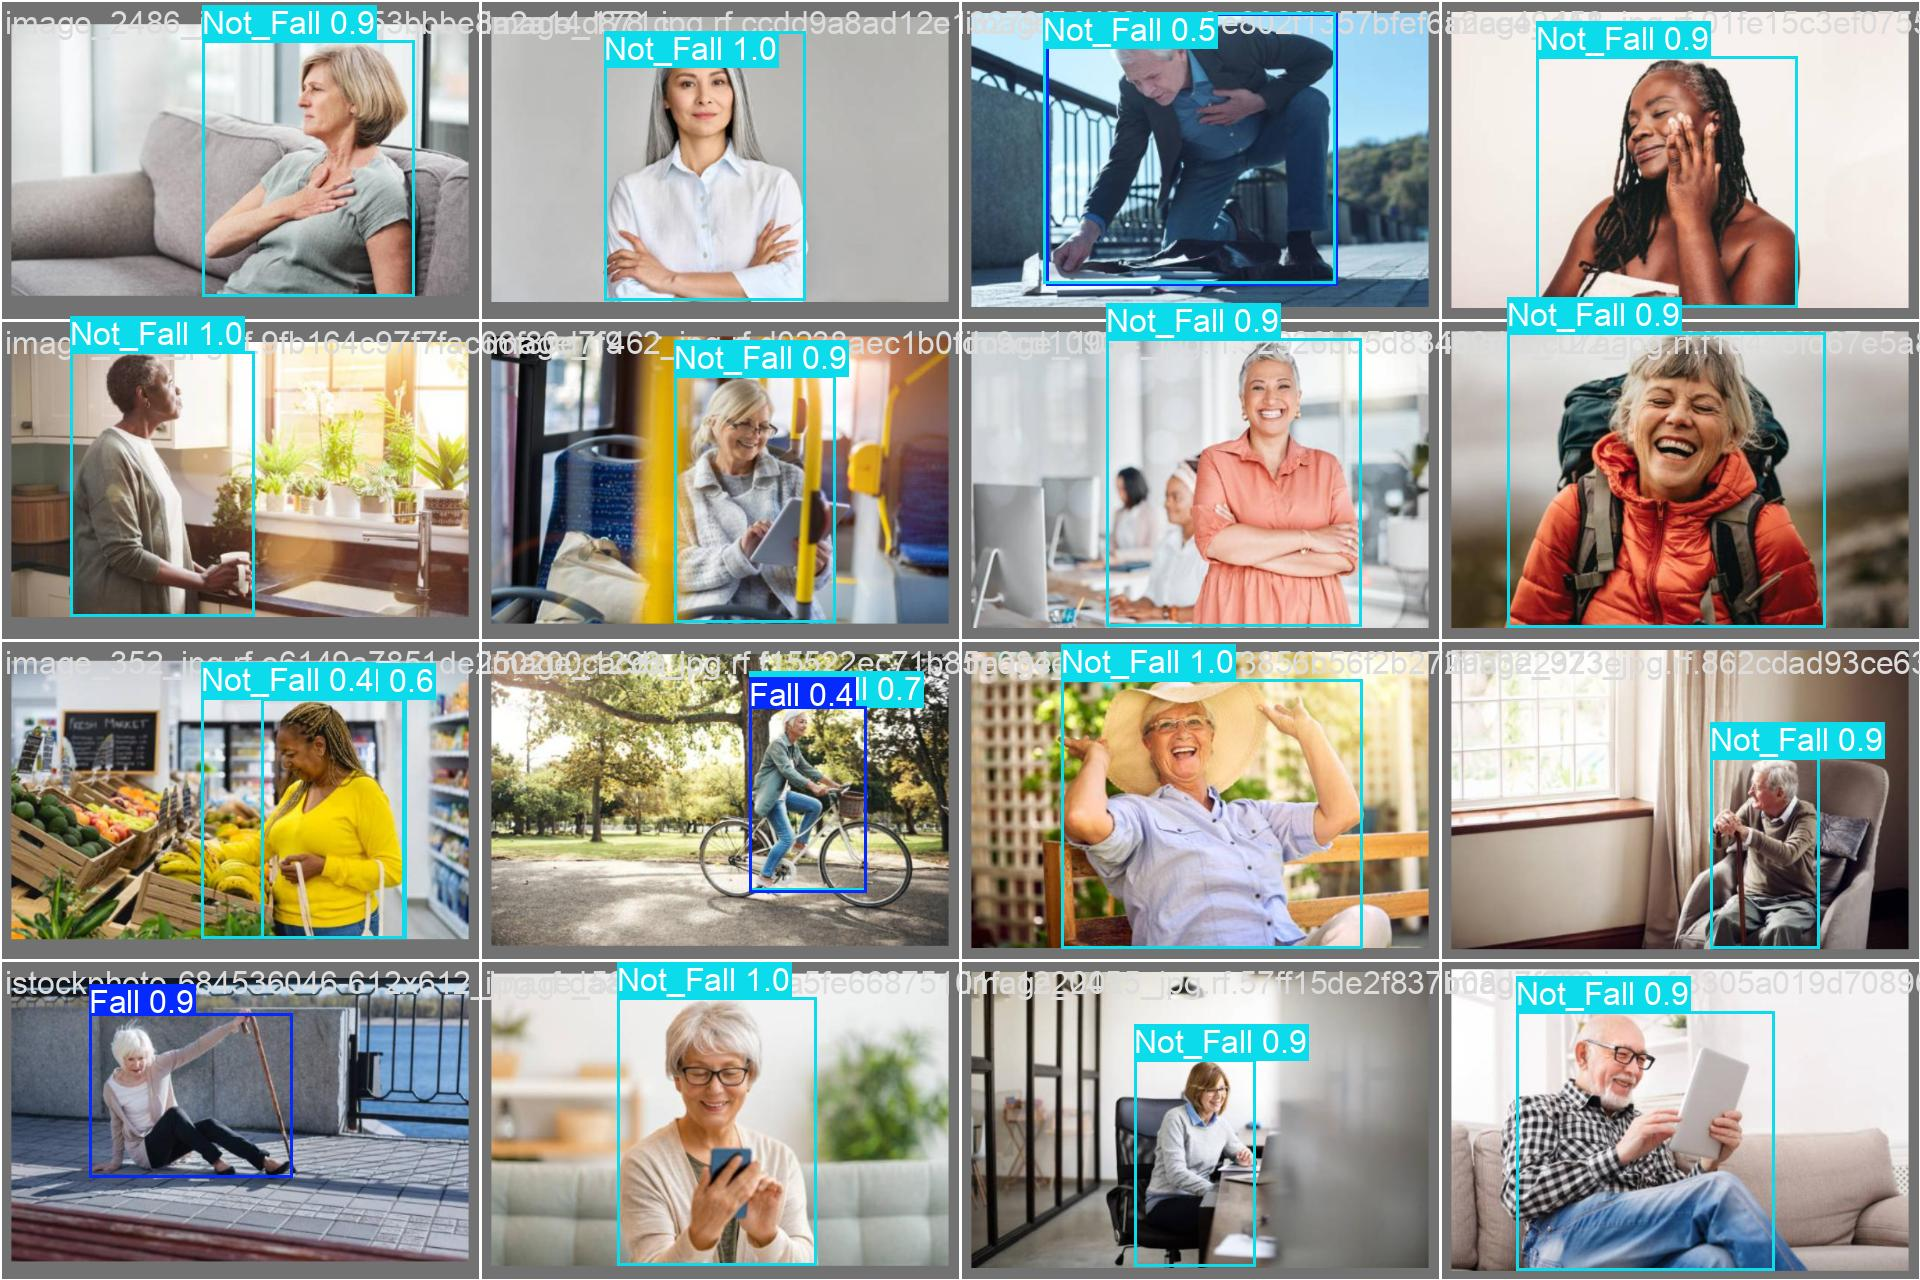

Displayed val_batch1_pred.jpg from: /content/runs/detect/val/val_batch1_pred.jpg


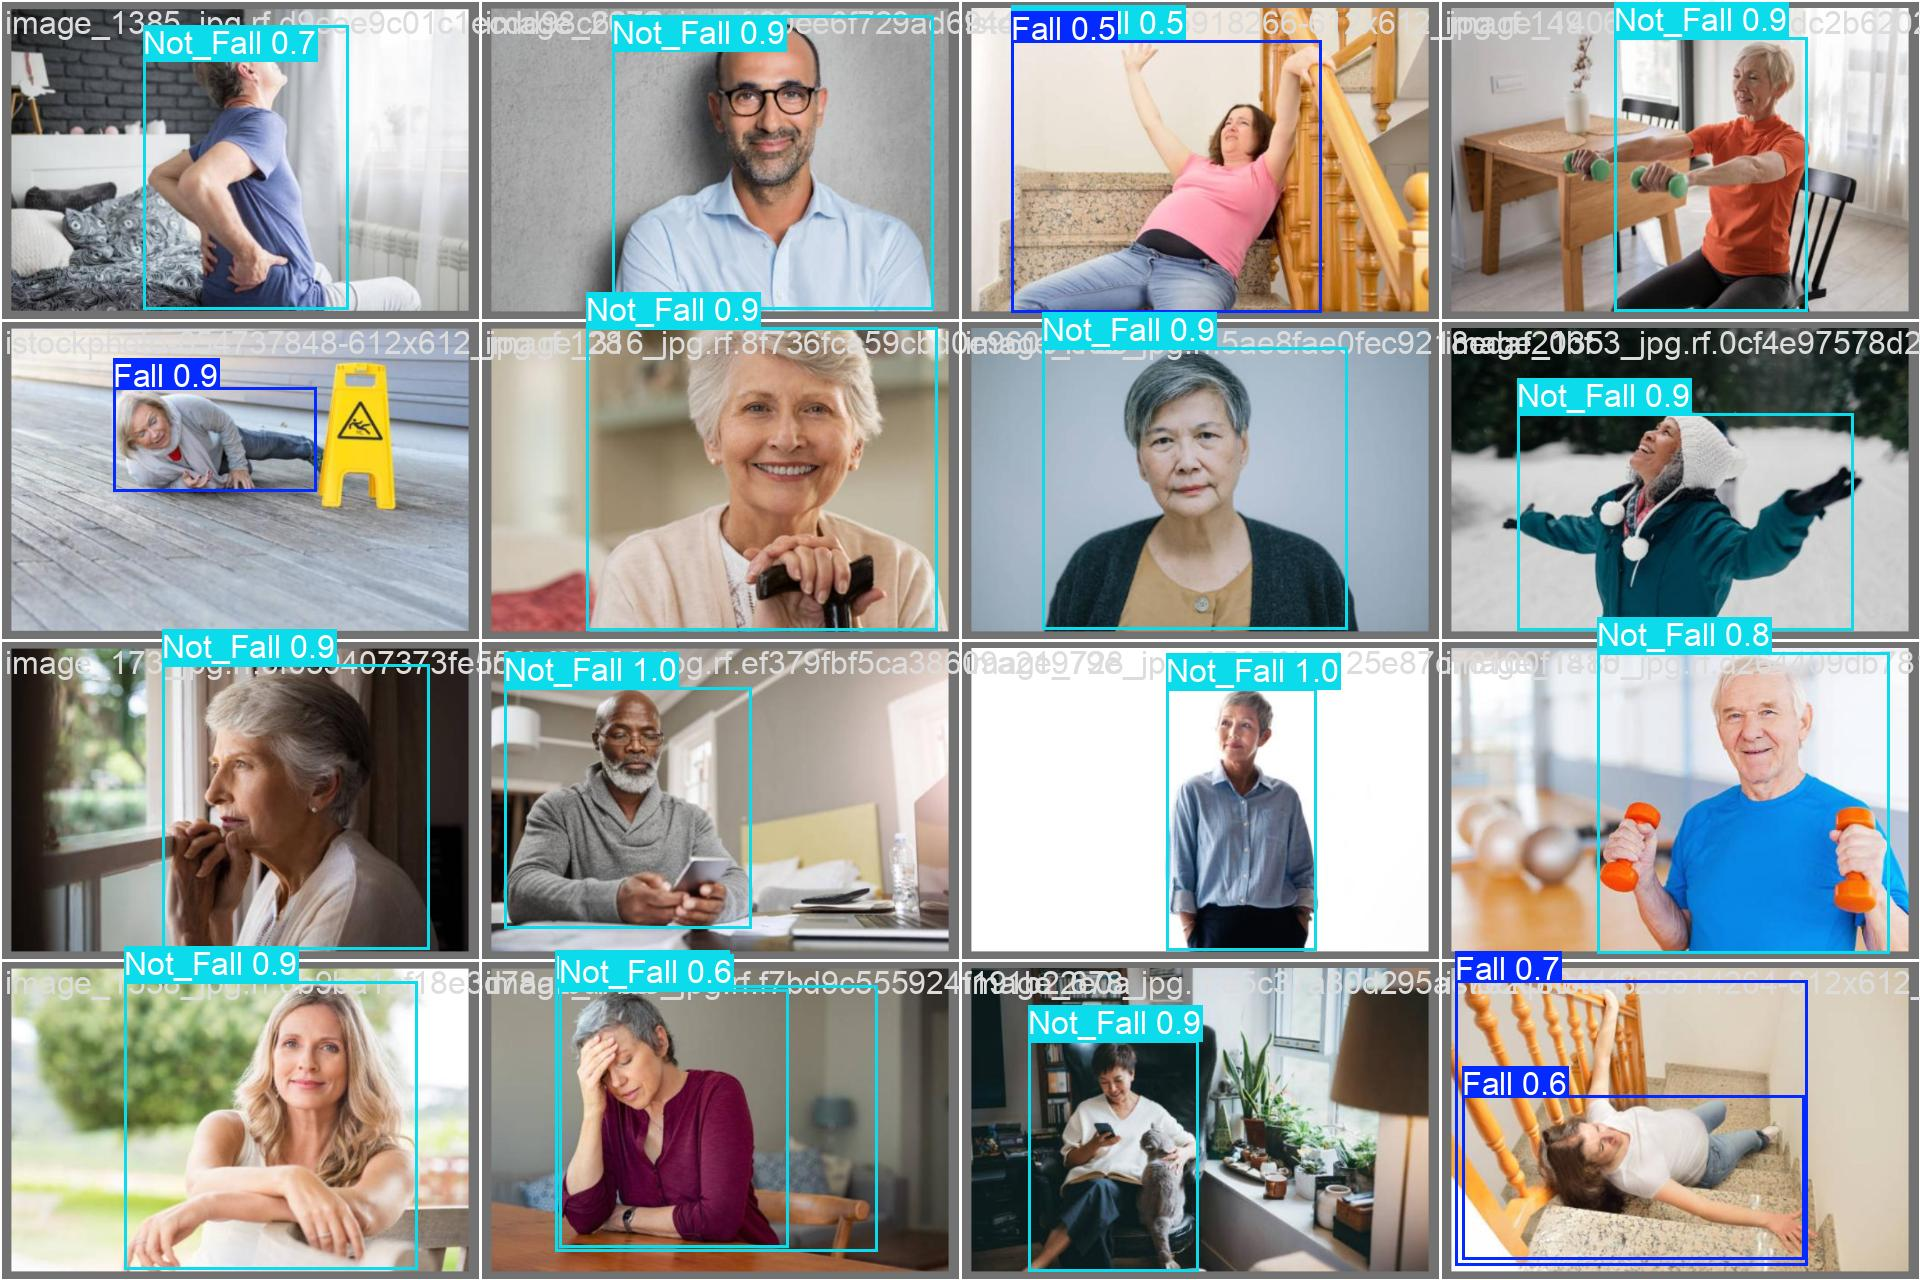

Displayed val_batch2_pred.jpg from: /content/runs/detect/val/val_batch2_pred.jpg
Sample prediction visualization complete.


In [ ]:
from IPython.display import Image
import os

# List of sample prediction images to display
prediction_image_files = ['val_batch0_pred.jpg', 'val_batch1_pred.jpg', 'val_batch2_pred.jpg']

print("Displaying sample prediction images from validation results...")

for image_file in prediction_image_files:
    image_path = os.path.join(val_results_dir, image_file)

    if os.path.exists(image_path):
        display(Image(filename=image_path, width=800))
        print(f"Displayed {image_file} from: {image_path}")
    else:
        print(f"Error: {image_file} not found at {image_path}")

print("Sample prediction visualization complete.")

## Final Task

### Subtask:
Summarize the key insights gained from visualizing the training and evaluation results, highlighting the model's strengths and potential areas for improvement.


## Summary:


### Data Analysis Key Findings
*   The YOLOv8 training results directory was successfully identified as `/content/runs/detect/train3`, and the validation results directory as `/content/runs/detect/val`.
*   A comprehensive overview of the model's learning progress was provided by successfully displaying the `results.png` image, which includes loss, mAP, precision, and recall curves over epochs.
*   Detailed validation performance metrics, including Precision-Recall curves (`BoxP_curve.png`, `BoxR_curve.png`) and the F1-score curve (`BoxF1_curve.png`), were successfully displayed, enabling analysis of model behavior at various confidence thresholds.
*   The normalized confusion matrix (`confusion_matrix_normalized.png`) was successfully visualized, offering crucial insights into class-wise true positives, false positives, and false negatives.
*   Sample prediction images (`val_batch0_pred.jpg`, `val_batch1_pred.jpg`, `val_batch2_pred.jpg`) from the validation set were successfully displayed, allowing for a qualitative visual assessment of the model's detection accuracy on unseen data.

### Insights or Next Steps
*   The successful display of various training and validation metrics provides a solid foundation for a thorough quantitative and qualitative analysis of the YOLOv8 model's performance, allowing for identification of overfitting, underfitting, and class-specific detection issues.
*   The next step involves a detailed interpretation of the displayed images (training curves, PR/F1 curves, confusion matrices, and sample predictions) to pinpoint specific model strengths (e.g., high mAP for certain classes) and areas needing improvement (e.g., high false positives, misclassifications, or poor localization for specific objects), which could inform further model training or data augmentation strategies.
